In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [49]:
data = pd.read_csv('detection.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,trans_num,first,cc_num,merchant,category,amt,last,gender,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 0:00,0b242abb623afc578575680df30655b9,Jennifer,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",03-09-1988,1325376018,36.011293,-82.048315,0
1,1,01-01-2019 0:00,1f76529f8574734946361c461b024d99,Stephanie,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,...,99160,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1325376044,49.159047,-118.186462,0
2,2,01-01-2019 0:00,a1a22d70485983eac12b5b88dad1cf95,Edward,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Sanchez,M,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,1325376051,43.150704,-112.154481,0
3,3,01-01-2019 0:01,6b849c168bdad6f867558c3793159a81,Jeremy,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,White,M,...,59632,46.2306,-112.1138,1939,Patent attorney,01-12-1967,1325376076,47.034331,-112.561071,0
4,4,01-01-2019 0:03,a41d7549acf90789359a9aa5346dcb46,Tyler,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Garcia,M,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,1325376186,38.674999,-78.632459,0


In [50]:
data.info

<bound method DataFrame.info of      Unnamed: 0 trans_date_trans_time                         trans_num  \
0             0       01-01-2019 0:00  0b242abb623afc578575680df30655b9   
1             1       01-01-2019 0:00  1f76529f8574734946361c461b024d99   
2             2       01-01-2019 0:00  a1a22d70485983eac12b5b88dad1cf95   
3             3       01-01-2019 0:01  6b849c168bdad6f867558c3793159a81   
4             4       01-01-2019 0:03  a41d7549acf90789359a9aa5346dcb46   
..          ...                   ...                               ...   
495         495       01-01-2019 6:29  af4f7e2b4bd4af575f3c204b484c0a19   
496         496       01-01-2019 6:29  d7203e23d13fb7b6ec2e64e343491f14   
497         497       01-01-2019 6:31  fbd262bbb6d156f57ee4868089051ccf   
498         498       01-01-2019 6:32  6ed5502e8464efee2e341959617bb656   
499         499       01-01-2019 6:33  a8701a55000472ccae101302e4d2b9f1   

          first        cc_num                            merchant  

In [51]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,500.0,2.495000e+02,1.444818e+02,0.000000e+00,1.247500e+02,2.495000e+02,3.742500e+02,4.990000e+02
cc_num,500.0,5.144249e+17,1.431550e+18,6.049559e+10,1.800000e+14,3.530000e+15,4.840000e+15,4.990000e+18
amt,500.0,7.771566e+01,9.731961e+01,1.100000e+00,1.864500e+01,5.766500e+01,9.267500e+01,1.055470e+03
zip,500.0,4.900856e+04,2.736317e+04,1.330000e+03,2.391775e+04,4.818350e+04,7.204200e+04,9.978300e+04
lat,500.0,3.869204e+01,4.951696e+00,2.002710e+01,3.588877e+01,3.970820e+01,4.154883e+01,6.475560e+01
long,500.0,-9.083966e+01,1.493480e+01,-1.656723e+02,-9.807270e+01,-8.776440e+01,-7.980890e+01,-6.795030e+01
city_pop,500.0,7.599493e+04,2.412157e+05,2.300000e+01,7.175000e+02,2.381500e+03,1.535750e+04,1.595797e+06
unix_time,500.0,1.325388e+09,6.971555e+03,1.325376e+09,1.325382e+09,1.325387e+09,1.325394e+09,1.325400e+09
merch_lat,500.0,3.868742e+01,4.993246e+00,1.920921e+01,3.585402e+01,3.948408e+01,4.174346e+01,6.502350e+01
merch_long,500.0,-9.082982e+01,1.497498e+01,-1.661484e+02,-9.798223e+01,-8.772815e+01,-7.958519e+01,-6.852301e+01


In [52]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
trans_num                0
first                    0
cc_num                   0
merchant                 0
category                 0
amt                      0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'amt'}>],
       [<Axes: title={'center': 'zip'}>, <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'merch_lat'}>],
       [<Axes: title={'center': 'merch_long'}>,
        <Axes: title={'center': 'is_fraud'}>, <Axes: >]], dtype=object)

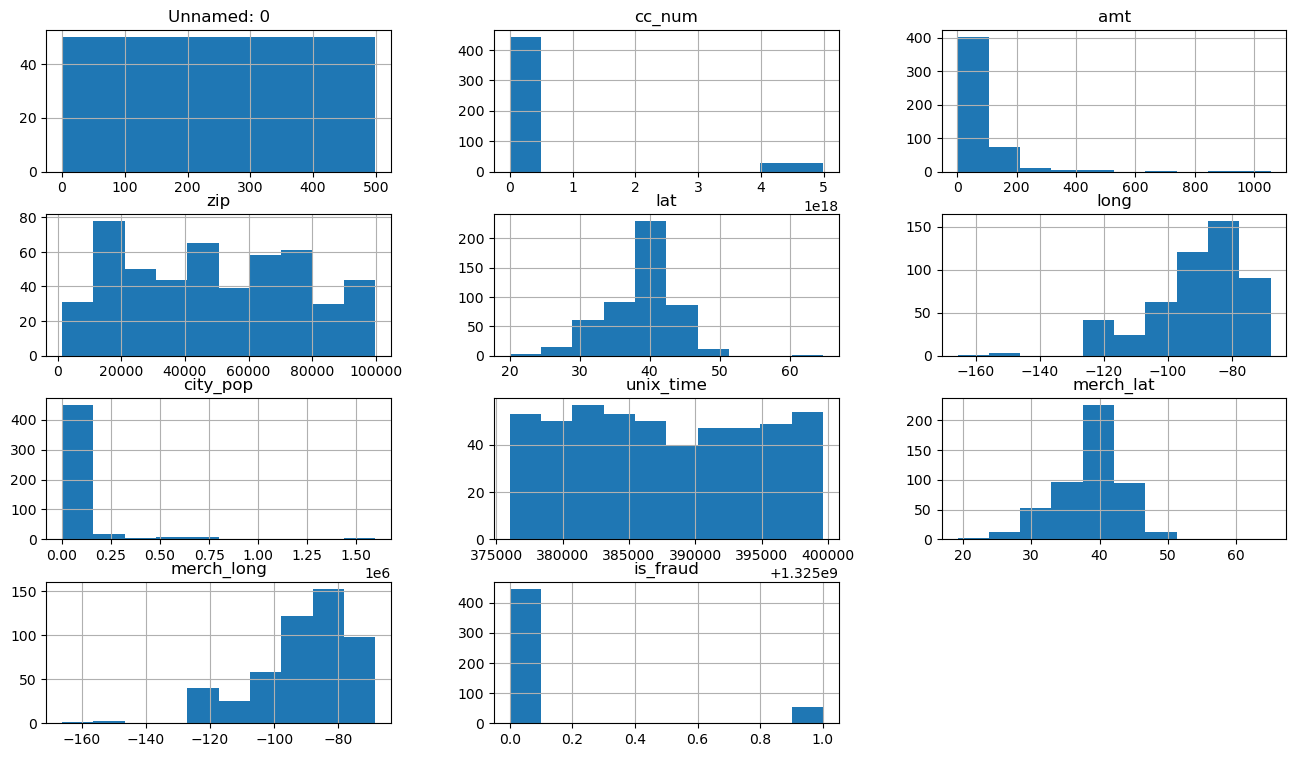

In [53]:
data.hist(figsize=(16,9))

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['trans_num']=le.fit_transform(data['trans_num'])
data['first']=le.fit_transform(data['first'])
data['trans_date_trans_time']=le.fit_transform(data['trans_date_trans_time'])
data.head()

,Unnamed: 0,trans_date_trans_time,trans_num,first,cc_num,merchant,category,amt,last,gender,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,0,24,92,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",03-09-1988,1325376018,36.011293,-82.048315,0
1,1,0,57,180,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,...,99160,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1325376044,49.159047,-118.186462,0
2,2,0,317,65,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Sanchez,M,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,1325376051,43.150704,-112.154481,0
3,3,1,215,93,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,White,M,...,59632,46.2306,-112.1138,1939,Patent attorney,01-12-1967,1325376076,47.034331,-112.561071,0
4,4,2,320,197,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Garcia,M,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,1325376186,38.674999,-78.632459,0


In [55]:
x=data.iloc[:,1:4]
x

,trans_date_trans_time,trans_num,first
0,0,24,92
1,0,57,180
2,0,317,65
3,1,215,93
4,2,320,197
...,...,...,...
495,283,343,53
496,283,417,126
497,284,490,203
498,285,226,109


In [56]:
y=data.iloc[:,-1:]
y.head()

,is_fraud
0,0
1,0
2,0
3,0
4,0


In [57]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
xtrain

,trans_date_trans_time,trans_num,first
249,143,72,8
433,251,157,34
19,10,19,115
322,183,242,25
332,189,280,159
...,...,...,...
106,64,286,38
270,155,363,26
348,198,358,182
435,251,415,115


In [59]:
ytrain

,is_fraud
249,0
433,0
19,0
322,0
332,0
...,...
106,0
270,1
348,0
435,0


In [61]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear",verbose=2)
#train the model
print('Training the model')
log_reg.fit(xtrain,ytrain)
#test the model
ypred = log_reg.predict(xtest)
print('the predict values are \n',ypred)
print()
print('Testing is completed')


Training the model
[LibLinear]the predict values are 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Testing is completed


C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Accuaracy score:\t\n',accuracy_score(ytest,ypred))
print()
print('Confusion matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classfication report:\n',classification_report(ytest,ypred))
print('='*80)

Accuaracy score:	
 0.9

Confusion matrix:
 [[90  0]
 [10  0]]

Classfication report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       0.00      0.00      0.00        10

    accuracy                           0.90       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.81      0.90      0.85       100



C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
data['is_fraud'].value_counts()

0    447
1     53
Name: is_fraud, dtype: int64

In [73]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)


In [69]:
x_resampled

,trans_date_trans_time,trans_num,first
0,0,24,92
1,0,57,180
2,0,317,65
3,1,215,93
4,2,320,197
...,...,...,...
889,97,315,77
890,44,209,149
891,269,220,116
892,203,456,182


In [76]:
y_resampled

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
889,1
890,1
891,1
892,1


In [77]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)

In [78]:
x_resampled

,trans_date_trans_time,trans_num,first
317,180,154,111
418,244,231,124
135,76,198,188
431,249,465,189
80,47,210,190
...,...,...,...
465,267,132,71
471,270,444,181
479,275,323,69
481,276,238,144


In [79]:
y_resampled

,is_fraud
317,0
418,0
135,0
431,0
80,0
...,...
465,1
471,1
479,1
481,1


In [81]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [82]:
x_resampled

,trans_date_trans_time,trans_num,first
0,0,24,92
1,0,57,180
2,0,317,65
3,1,215,93
4,2,320,197
...,...,...,...
889,97,315,77
890,44,209,149
891,269,220,116
892,203,456,182


In [83]:
y_resampled

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
889,1
890,1
891,1
892,1


In [80]:
data['is_fraud'].value_counts()

0    447
1     53
Name: is_fraud, dtype: int64

In [92]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

In [93]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear",verbose=2)
#train the model
print('Training the model')
log_reg.fit(xtrain,ytrain)
#test the model
ypred = log_reg.predict(xtest)
print('the predict values are \n',ypred)
print()
print('Testing is completed')


Training the model
[LibLinear]the predict values are 
 [1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1]

Testing is completed


C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Accuaracy score:\t\n',accuracy_score(ytest,ypred))
print()
print('Confusion matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classfication report:\n',classification_report(ytest,ypred))
print('='*80)

Accuaracy score:	
 0.5139664804469274

Confusion matrix:
 [[45 49]
 [38 47]]

Classfication report:
               precision    recall  f1-score   support

           0       0.54      0.48      0.51        94
           1       0.49      0.55      0.52        85

    accuracy                           0.51       179
   macro avg       0.52      0.52      0.51       179
weighted avg       0.52      0.51      0.51       179



In [95]:
xtrain.shape

(715, 3)

In [97]:
y_resampled['is_fraud'].value_counts()

0    447
1    447
Name: is_fraud, dtype: int64

In [98]:
log_reg.classes_

array([0, 1], dtype=int64)

In [99]:
log_reg.coef_

array([[ 0.0006057 ,  0.00070723, -0.00834376]])

In [100]:
log_reg.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(solver='liblinear', verbose=2)>

In [101]:
log_reg.dual

False

In [102]:
log_reg.feature_names_in_

array(['trans_date_trans_time', 'trans_num', 'first'], dtype=object)

In [103]:
log_reg.fit_intercept

True

In [104]:
log_reg.intercept_

array([0.56622247])

In [106]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

In [108]:
y_probs=log_reg.predict_proba(xtest)[:,1]
y_probs

array([0.57423352, 0.66209388, 0.580449  , 0.41221806, 0.57675799,
       0.64409813, 0.44099045, 0.67209511, 0.50062558, 0.67563812,
       0.60085279, 0.48348619, 0.37921899, 0.47272112, 0.62461968,
       0.42578641, 0.58395969, 0.45715894, 0.55114127, 0.39941692,
       0.65395803, 0.44473758, 0.60246338, 0.48787403, 0.33885608,
       0.56445676, 0.31500296, 0.68328917, 0.38402314, 0.43109851,
       0.58214246, 0.46691279, 0.69646358, 0.61054543, 0.44450445,
       0.64342116, 0.3355122 , 0.51754166, 0.56780139, 0.39792409,
       0.56441651, 0.68809268, 0.64626003, 0.5420666 , 0.51407502,
       0.6518682 , 0.34157256, 0.43936743, 0.45976959, 0.71131532,
       0.50808622, 0.57610712, 0.55011121, 0.49361587, 0.45871369,
       0.61511629, 0.37509026, 0.55334192, 0.49747769, 0.37004424,
       0.30113515, 0.67367501, 0.65483536, 0.35663825, 0.53526587,
       0.56687917, 0.62423399, 0.40059728, 0.51493454, 0.35047356,
       0.65899809, 0.51514496, 0.41373484, 0.66805414, 0.37717

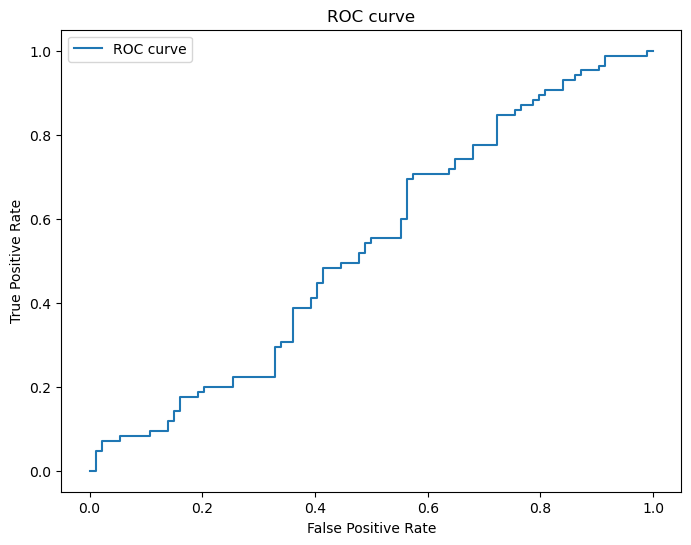

In [109]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
fpr,tpr,thresholds=roc_curve(ytest,y_probs)
roc_curve=auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()